In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("./data/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#### data is taken from kaggle
https://www.kaggle.com/mlg-ulb/creditcardfraud

# Exploratory Data Analysis

In [2]:
df["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

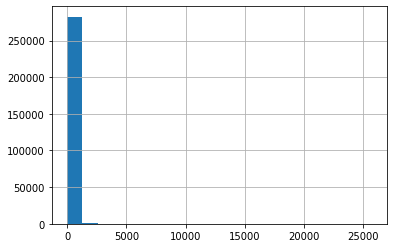

C:\Users\abhiv\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


None


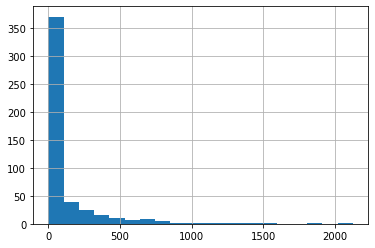

In [3]:
for grp,frm in df.groupby("Class"):
    frm["Amount"].hist(bins=20)
    if grp==1:
        print(frm.drop(frm[frm["Amount"]>1500].index,axis=0,inplace=True))
        
    plt.show()

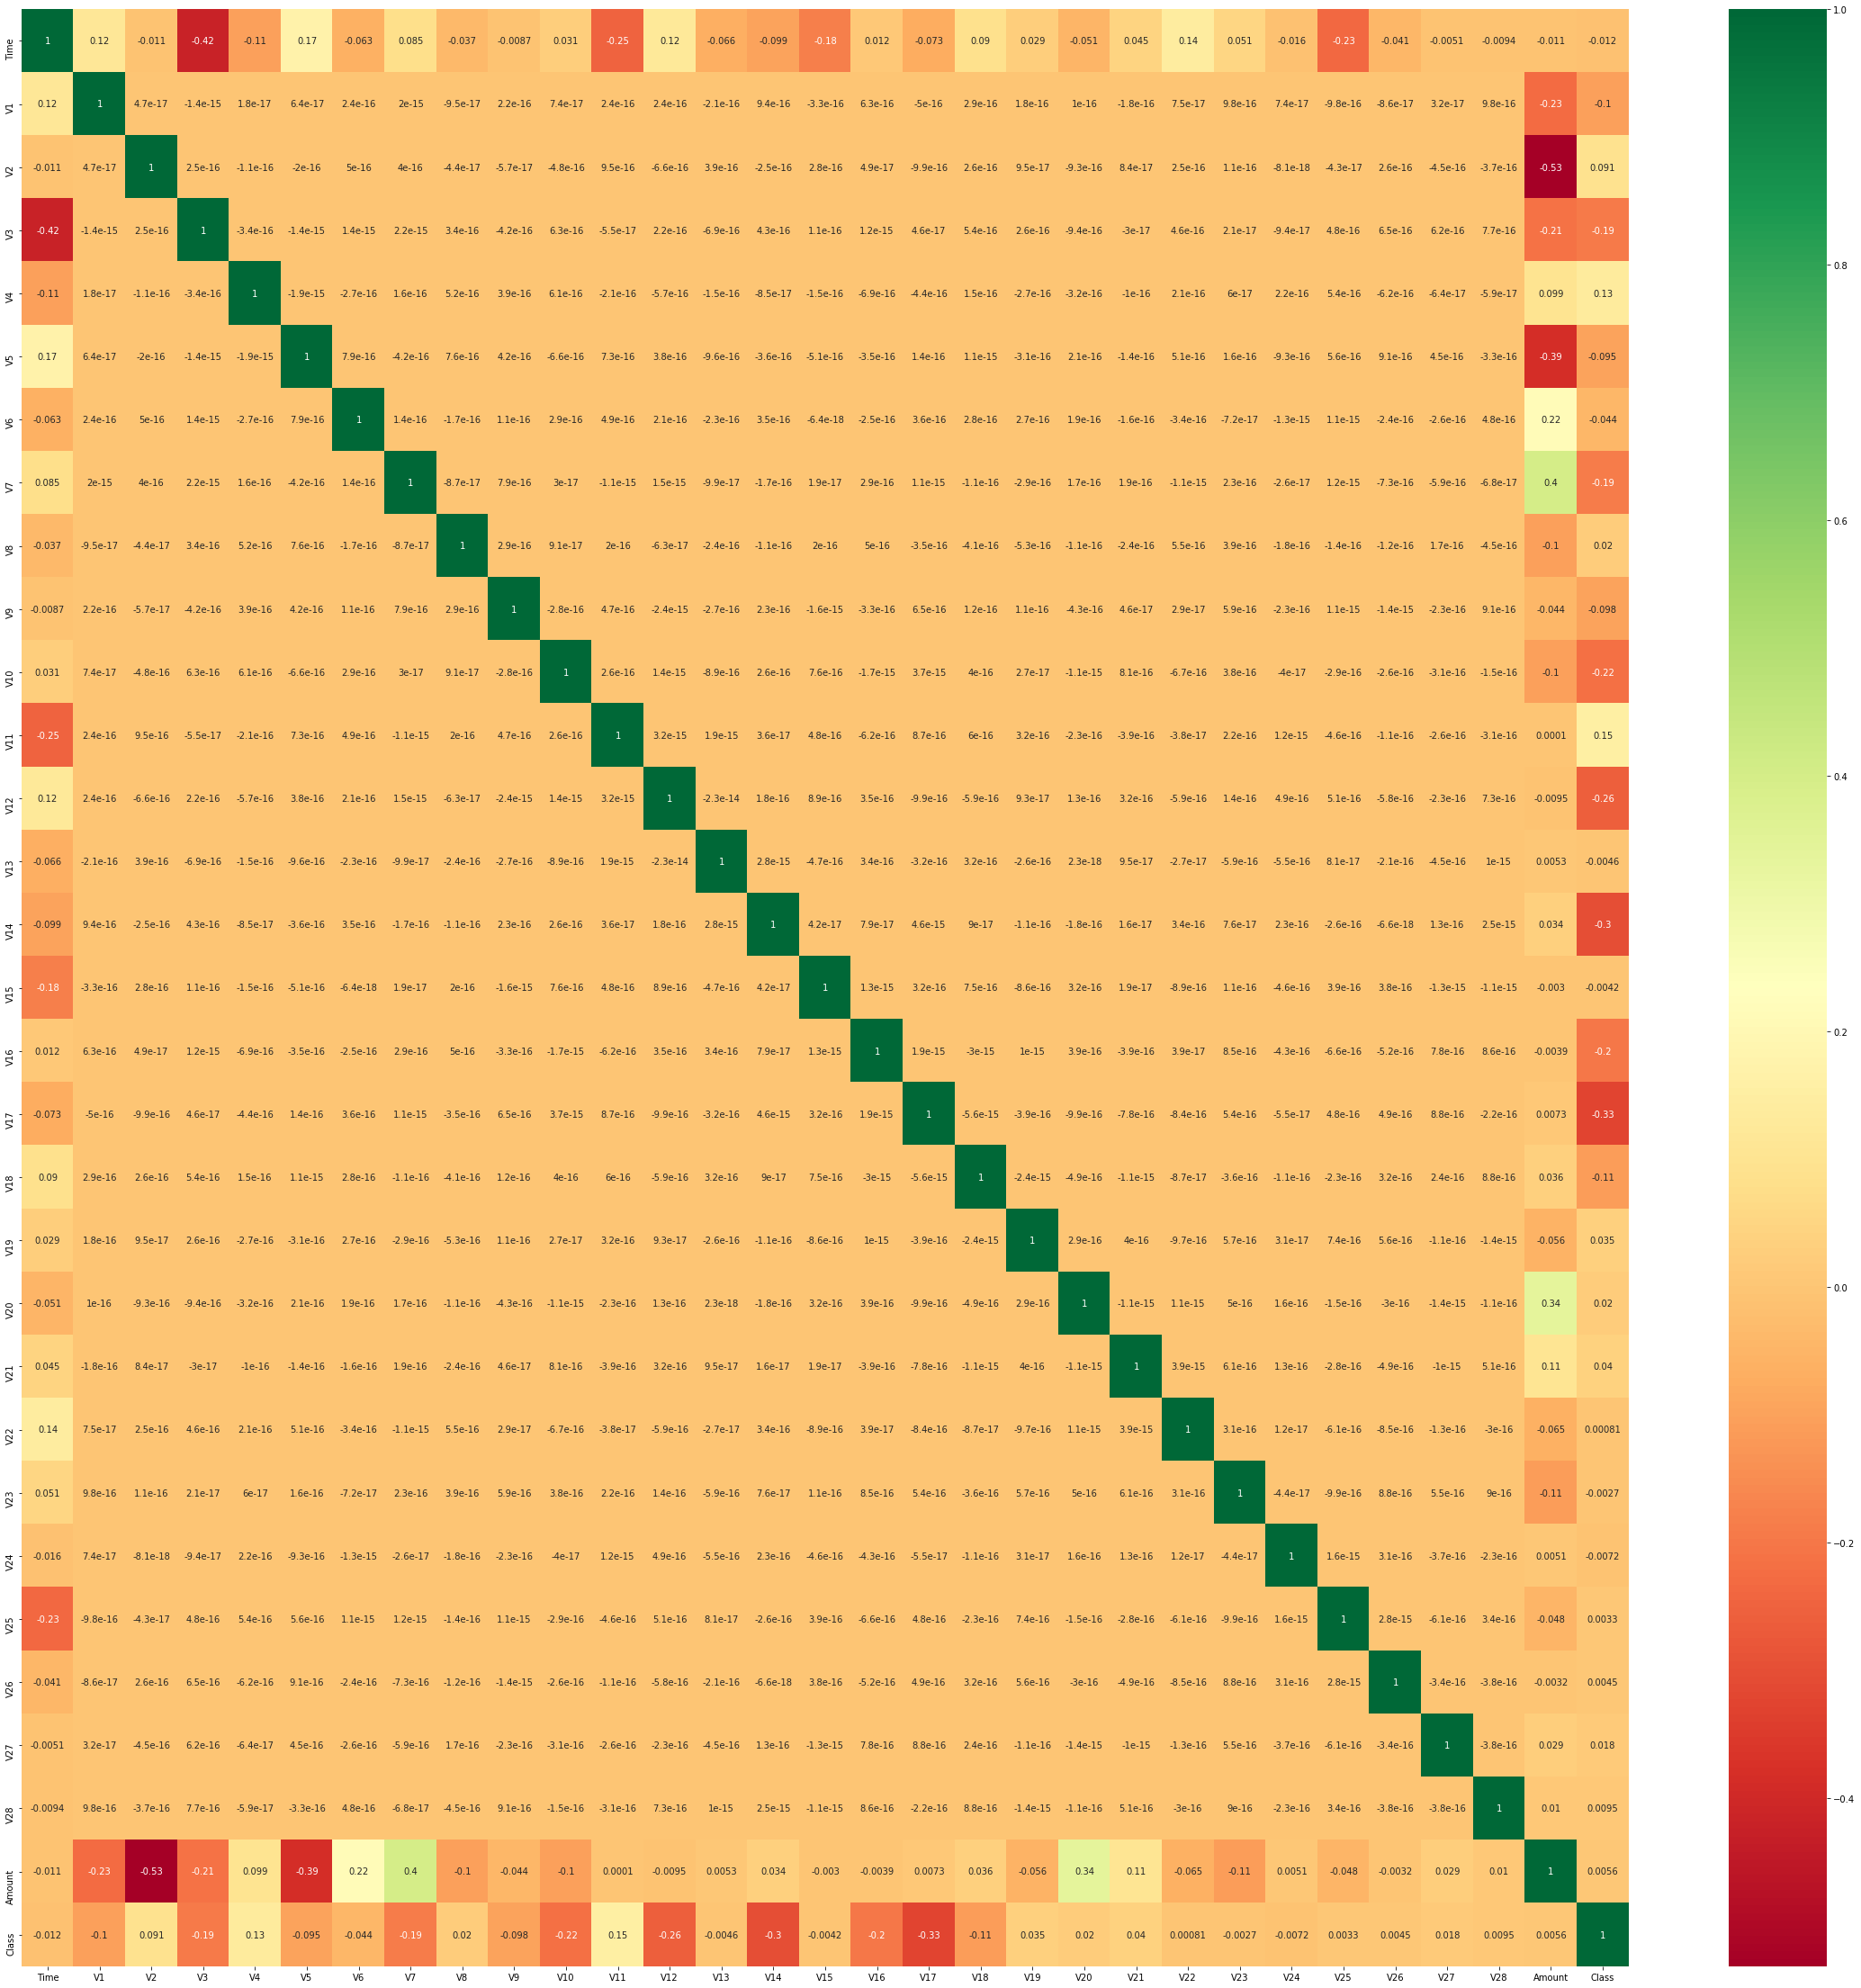

In [4]:
plt.figure(figsize=(40,40))
corr = df.corr()
ax = sns.heatmap(
    corr,annot=True,cmap="RdYlGn")


In [5]:
#sns.pairplot(df,hue=df["Class"])#due to large data set pair plot is difficult

# Logistic Regression

C:\Users\abhiv\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


accuracy_score0.9988904806044774
[[71049    40]
 [   39    74]]
0.6548672566371682
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71089
           1       0.65      0.65      0.65       113

    accuracy                           1.00     71202
   macro avg       0.82      0.83      0.83     71202
weighted avg       1.00      1.00      1.00     71202



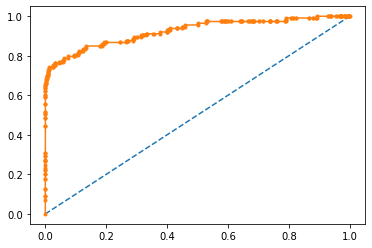

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,precision_score,recall_score,classification_report
x=df.drop("Class",axis=1)
y=df["Class"]
x_train ,x_test,y_train,y_test=train_test_split(x,y,random_state=42)
clf=LogisticRegression(C=10)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
y_prob=clf.predict_proba(x_test)
print("accuracy_score"+str(accuracy_score(y_test,y_pred)))
print(confusion_matrix(y_test,y_pred))
#print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
y_prob=y_prob[:,1]
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
fpr, tpr,thes = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, marker='.', label='Logistic')
print(classification_report(y_test,y_pred))


# Random Forest

In [7]:
from sklearn.ensemble import RandomForestClassifier
clf1=RandomForestClassifier().fit(x_train,y_train)
y_pred=clf1.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.9996067526193084


[[71084     5]
 [   23    90]]
accuracy_score0.9996067526193084
0.9473684210526315
0.7964601769911505
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71089
           1       0.95      0.80      0.87       113

    accuracy                           1.00     71202
   macro avg       0.97      0.90      0.93     71202
weighted avg       1.00      1.00      1.00     71202



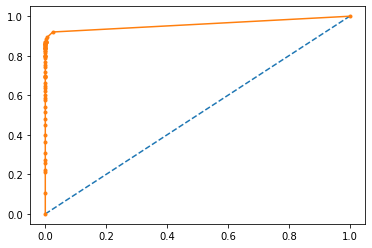

In [8]:
print(confusion_matrix(y_test,y_pred))
y_prob=clf1.predict_proba(x_test)
print("accuracy_score"+str(accuracy_score(y_test,y_pred)))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
y_prob=y_prob[:,1]
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
fpr, tpr,thes = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, marker='.', label='Random forest')
print(classification_report(y_test,y_pred))